# Metrica Pitch Dominance

##### Loading and Displaying the Metrica sample tracking data, and building a _basic_ pitch dominance model.

---

### Extracting and Loading Data

---

In [ ]:
# This builds the soccerutils module in the Analytics Handbook so you can import it
!pip install git+https://github.com/devinpleuler/analytics-handbook.git

In [1]:
from soccerutils.metrica import build_tracking
from soccerutils.pitch import Pitch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [3]:
away_tracking = 'https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv'
home_tracking = 'https://raw.githubusercontent.com/metrica-sports/sample-data/master/data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv'

The raw Metrica tracking files are stored here, on Github.

---

In [4]:
frames = build_tracking(home_tracking, away_tracking)

This builds the tracking frames from the raw data using the `build_tracking` function from our `soccerutils` module.

---

In [5]:
frames[0]

{'Period_x': 1,
 'Time [s]_x': 0.04,
 'home_11_x': 0.00082,
 'home_11_y': 0.48238000000000003,
 'home_1_x': 0.32648,
 'home_1_y': 0.65322,
 'home_2_x': 0.33701,
 'home_2_y': 0.48863,
 'home_3_x': 0.30927,
 'home_3_y': 0.35529,
 'home_4_x': 0.32137,
 'home_4_y': 0.21261999999999998,
 'home_5_x': 0.41093999999999997,
 'home_5_y': 0.7258899999999999,
 'home_6_x': 0.41698,
 'home_6_y': 0.47843,
 'home_7_x': 0.39125,
 'home_7_y': 0.3255,
 'home_8_x': 0.45388,
 'home_8_y': 0.21174,
 'home_9_x': 0.5269699999999999,
 'home_9_y': 0.3798,
 'home_10_x': 0.55243,
 'home_10_y': 0.43268999999999996,
 'home_12_x': nan,
 'home_12_y': nan,
 'home_13_x': nan,
 'home_13_y': nan,
 'home_14_x': nan,
 'home_14_y': nan,
 'Period_y': 1,
 'Time [s]_y': 0.04,
 'away_25_x': 0.90509,
 'away_25_y': 0.47462,
 'away_15_x': 0.5839300000000001,
 'away_15_y': 0.20794,
 'away_16_x': 0.6765800000000001,
 'away_16_y': 0.4671,
 'away_17_x': 0.6731,
 'away_17_y': 0.76476,
 'away_18_x': 0.40783,
 'away_18_y': 0.61525,
 'away

In [6]:
home_jerseys = list(set([x.split("_")[1] for x in frames[0].keys() if 'home' in x]))
away_jerseys = list(set([x.split("_")[1] for x in frames[0].keys() if 'away' in x]))

Look at the dictionary keys of the first tracking frame (i.e. `frame[0]`) and determine jersey numbers.

---

In [7]:
frameIdx = 600
f = frames[frameIdx]

Let's use frame 600 as an example, but you can use whatever frame you would like in the frames list.

---

In [8]:
home_points = np.array([(f['home_{}_x'.format(p)],
                         f['home_{}_y'.format(p)]) for p in home_jerseys]) * [120, 80]

away_points = np.array([(f['away_{}_x'.format(p)],
                         f['away_{}_y'.format(p)]) for p in away_jerseys]) * [120, 80]

We use a few list comprehensions to grab the x and y components for each jersey number, and stick them into a `numpy` array.

Once in the numpy array, we can broadcast the `* [120, 80]` expression to scale the coordinates to raw field locations.

---

In [9]:
home_points

array([[11.8152, 39.18  ],
       [    nan,     nan],
       [46.068 , 32.2784],
       [73.8504, 32.4376],
       [55.1628, 42.1896],
       [61.926 , 51.7744],
       [43.4928, 44.9256],
       [62.4336, 61.1888],
       [    nan,     nan],
       [    nan,     nan],
       [58.9572, 50.2256],
       [47.3052, 59.9112],
       [68.7924, 53.1224],
       [42.5748, 51.2016]])

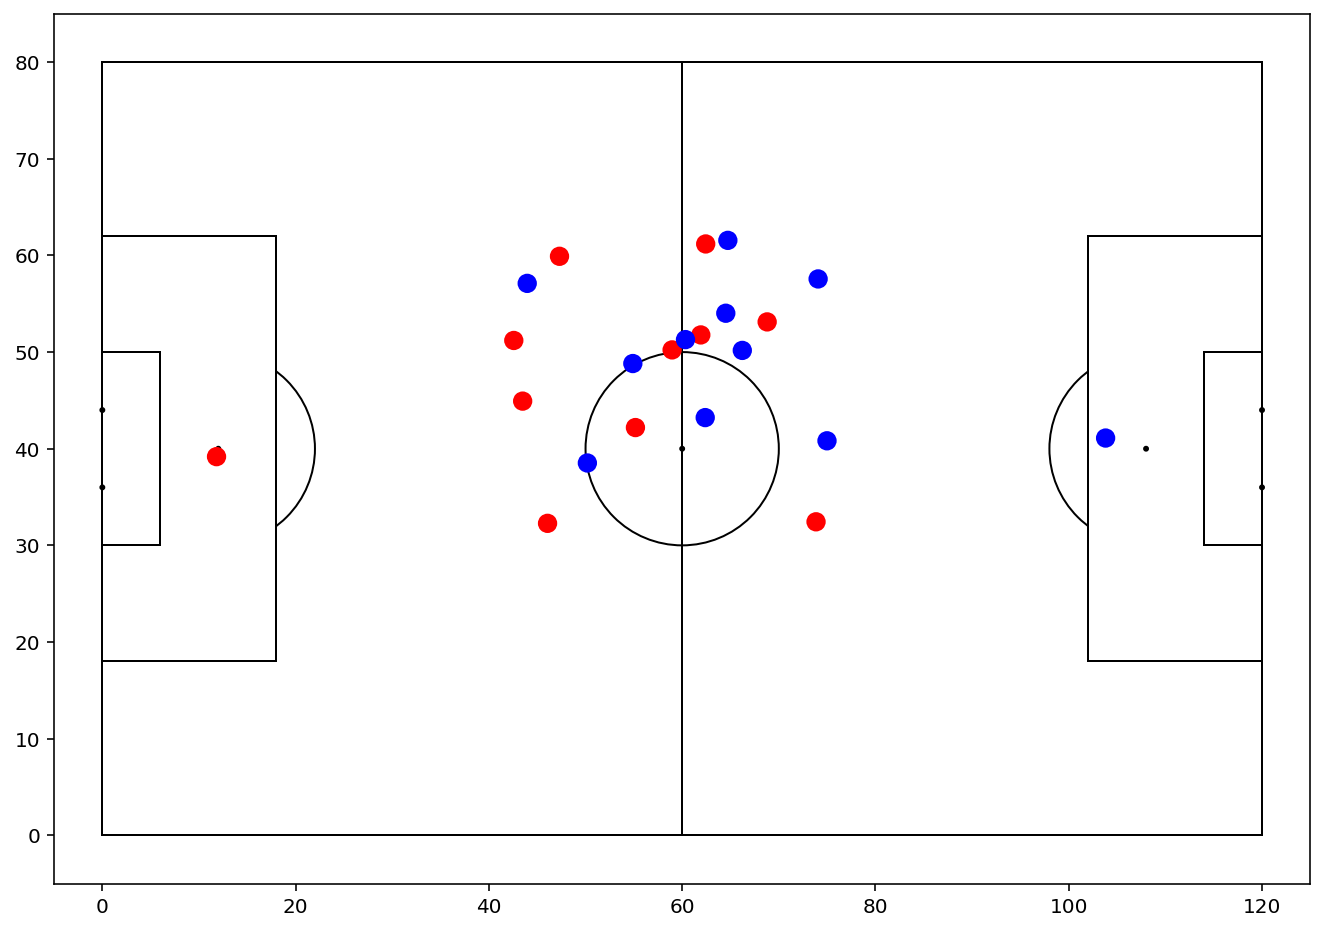

In [10]:
home_cosmetics = {'facecolor': "red", 'radius': 1}
away_cosmetics = {'facecolor': "blue", 'radius': 1}

fig, ax = plt.subplots(figsize=(12,8))
ax.set_aspect(1)
pitch = Pitch(120, 80) # Field size is 120 by 80
pitch.create_pitch(ax)

pitch.draw_points(ax, home_points, cosmetics = home_cosmetics)
pitch.draw_points(ax, away_points, cosmetics = away_cosmetics)

plt.ylim(pitch.ylim)
plt.xlim(pitch.xlim)
plt.show()

Plot the home and away points using our `Pitch` object, provided by the `soccerutils` module.

---

### Pitch Dominance Example

---

In [11]:
xdim, ydim = 50, 30
home_surface = np.zeros((xdim, ydim), dtype=np.float)
away_surface = np.zeros((xdim, ydim), dtype=np.float)

Build an empty `50 x 30` matrix for each team

---

In [12]:
x_bins = np.linspace(0, 120, xdim)
y_bins = np.linspace(0, 80, ydim)

Use `np.linspace` to determine the spatial bounds that each cell in the matrix represents.

---

In [13]:
for points, surface in [(home_points, home_surface),(away_points, away_surface)]:

    for x,y in points:
        xbin = np.digitize(x, x_bins)
        ybin = np.digitize(y, y_bins)
        try:
            surface[xbin][ybin] += 1
        except IndexError:
            pass

Use `np.digitize`, along with the bins you just created, to set cells values equal to one where there is a corresponding player.

---

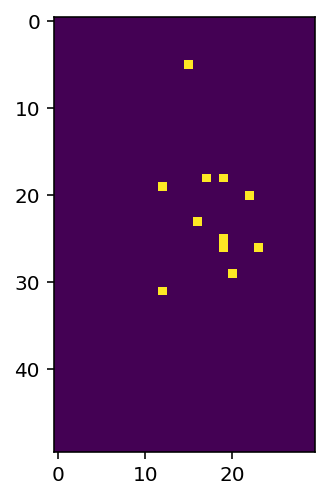

In [14]:
plt.imshow(home_surface)

Plot the matrix. It's quite sparse, naturally.

---

If you subtract the two matricies, you get this below:

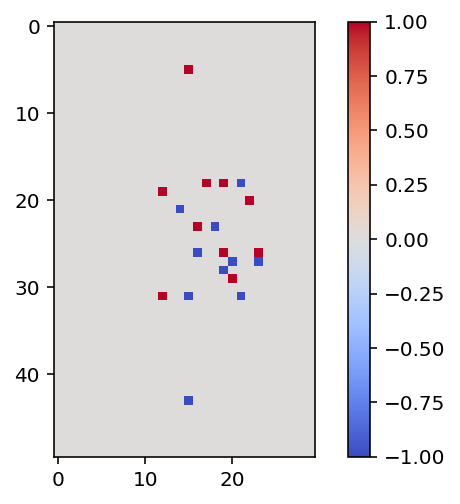

In [15]:
plt.imshow(home_surface - away_surface, cmap='coolwarm')
plt.clim(-1,1) # Color Range
plt.colorbar()
plt.show()

In [16]:
from scipy.ndimage import gaussian_filter

Using a gaussian blur provided by `gaussian_filter`, we can smooth these values across each other to create a field dominance surface.

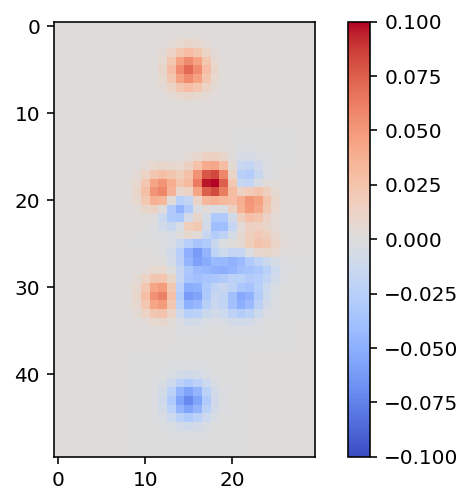

In [17]:
surface = gaussian_filter(home_surface - away_surface, sigma=1.5)
plt.imshow(surface, cmap='coolwarm')
plt.clim(-.1,.1) # Color Range
plt.colorbar()
plt.show()

By applying a contour plot on top of this surface, we can easily display this dominance surface with player dots plotted on top.

You can play with the number of `levels` and additional `guassian_filter` to adjust the visualization to your liking.

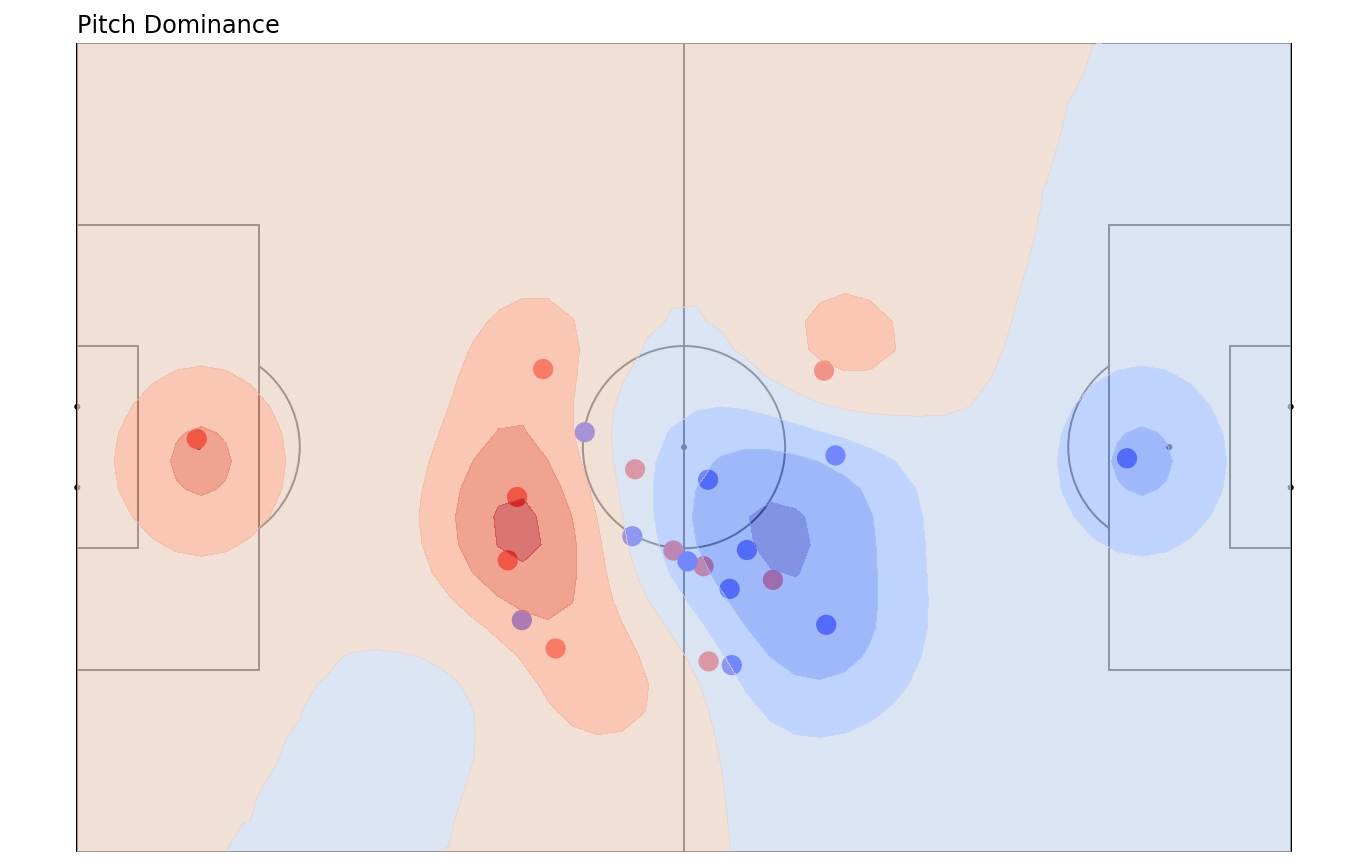

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))

pitch = Pitch(title="Pitch Dominance")
pitch.create_pitch(ax)

z = np.rot90(gaussian_filter(surface, sigma=2.2), 1)

ax.contourf(x_bins, y_bins, z,
            zorder=2,
            levels=6,
            alpha=0.7,
            cmap='coolwarm')

pitch.draw_points(ax, [[x, 80-y] for x,y in home_points], cosmetics = home_cosmetics)
pitch.draw_points(ax, [[x, 80-y] for x,y in away_points], cosmetics = away_cosmetics)

ax.set_aspect(1)
ax.axis('off')
plt.show()

Notice we need to flip the y-coordinates via a list comprehension. This is because `plt.contourf` doesn't play super nicely with `plt.imshow`

---

Devin Pleuler 2020